# Лабораторная работа №1
## Персептроны. Процедура обучения Розенблатта

Выполнил Попов Матвей

Группа М8О-408Б-20

Вариант 21

### Однослойный персептрон

* Для первой обучающей выборки построить и обучить сеть, которая будет 
правильно относить точки к двум классам. Отобразить дискриминантную линию и 
проверить качество обучения.

* Изменить обучающее множество так, чтобы классы стали линейно неразделимыми. 
Проверить возможности обучения по правилу Розенблатта.

Импортируем необходимые библиотеки

In [104]:
import numpy as np
import matplotlib.pyplot as plt


Выпишем точки из варианта

In [105]:
x1 = [2.6, -4, -1.5, 0.2, -3.3, 4]
y1 = [3.1, -3.3, -4.5, -1.7, -3, 1.7]

c1 = [0, 1, 1, 0, 1, 0]


Реализуем класс персептрона с полями `X` (список, где каждый элемент 
представляет собой вектор [1, x, y], где x и y - это координаты точки, а 1 - 
добавленный признак, который используется для вычисления весов) и `Y` (классы 
точек).

In [106]:
class Perseptron:
    X = list()
    Y = list()

    def __init__(self, x1, y1, c1) -> None:
        self.X = [[1, *x] for x in list(zip(x1, y1))]
        self.Y = c1

    def activation(self, x):
        if x < 0:
            return 0
        else:
            return 1
    
    def fit(self, epochs=20, step=0.1):
        weights = np.random.rand(3)
        for _ in range(epochs):
            for x, y in zip(self.X, self.Y):
                ry = np.dot(x, weights)
                act = self.activation(ry)
                eps = y - act
                if eps != 0:
                    weights = weights + np.multiply(x, eps * step)
        return weights


Создадим персептрон и получим веса

In [107]:
p = Perseptron(x1, y1, c1)
weigths = p.fit()


Изобразим на графике точки и разделяющую их прямую, точки, относящиеся к классу 
`0`, обозначены красным цветом, к классу `1` — синим.

C:\Users\papey08\AppData\Local\Temp/ipykernel_13276/632385456.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X[i][0], X[i][1], 'ro', color='r' if c1[i] == 0 else 'b')


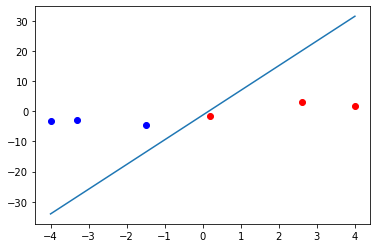

In [108]:

def show_points(x1, y1, c1):
    X = list(zip(x1, y1))
    for i in range(len(X)):
        plt.plot(X[i][0], X[i][1], 'ro', color='r' if c1[i] == 0 else 'b')

def show_line(weigths):
    def calc_y(x):
        return -weigths[1]*x/weigths[2] - weigths[0]/weigths[2]
    pts = np.array([-4,4])
    plt.plot(pts, calc_y(pts))

show_points(x1, y1, c1)
show_line(weigths)


Как видим, прямая, построенная по весам, полученным от персептрона, разделяет 
точки, относящиеся к разным классам. Теперь попробуем разделить с помощью 
персептрона точки, которые невозможно разделить прямой.

C:\Users\papey08\AppData\Local\Temp/ipykernel_13276/632385456.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X[i][0], X[i][1], 'ro', color='r' if c1[i] == 0 else 'b')


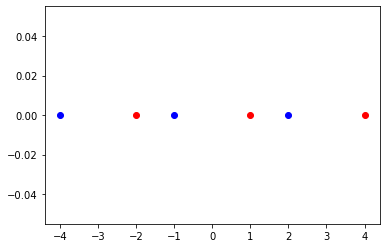

In [109]:
x1 = [-4, -2, -1, 1, 2, 4]
y1 = [0, 0, 0, 0, 0, 0]
c1 = [1, 0, 1, 0, 1, 0]

show_points(x1, y1, c1)


In [110]:
p = Perseptron(x1, y1, c1)
weigths = p.fit()


C:\Users\papey08\AppData\Local\Temp/ipykernel_13276/632385456.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X[i][0], X[i][1], 'ro', color='r' if c1[i] == 0 else 'b')


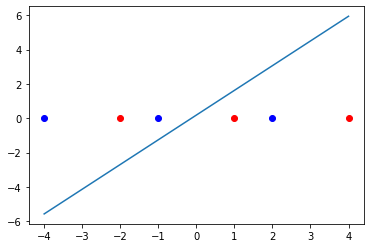

In [111]:
show_points(x1, y1, c1)
show_line(weigths)


Персептрон не справился. Никто бы не справился.

## Двуслойный персептрон

* Для второй обучающей выборки построить и обучить сеть, которая будет 
правильно относить точки к четырем классам. Отобразить дискриминантную линию и 
проверить качество обучения.

Выпишем точки из варианта

In [112]:
x2 = [[-1.2, 0.8],
      [-2.5, -2.1],
      [1.1, -2.4],
      [3.2, 4.8],
      [2.3, -1.6],
      [0.8, -4],
      [4, -3.7],
      [3.1, -2.4]]

c2 = [[1,1],
      [1,1],
      [0,1],
      [1,0],
      [0,0],
      [0,1],
      [0,0],
      [0,0]]


Реализуем двуслойный персептрон

In [113]:
class NewPerseptron:
    X = list()
    Y = list()

    def __init__(self, x2, c2) -> None:
        self.X = [[1, *x] for x in x2]
        self.Y = c2

    def forward(self, x, w):
        return self.activation(np.dot(x, w))
    
    def activation(self, t):
        return np.array([0 if y < 0 else 1 for y in t])
    
    def fit(self, epochs=100, step=0.01):
        weights = np.random.rand(3, 2).tolist()
        for _ in range(epochs):
            for x, y in zip(self.X, self.Y):
                actr = self.forward(x, weights)
                diff = y - actr
                if np.count_nonzero(diff) > 0:
                    for i in range(3):
                        for j in range(2):
                            weights[i][j] = weights[i][j] + step*x[i]*diff[j]
        return weights

Создадим персептрон и обучим веса

In [114]:
p = NewPerseptron(x2, c2)
weights = p.fit()

Изобразим точки на графике, относящиеся к одному классу точки обозначим одним 
цветом. Попробуем разделить эти точки прямыми, полученными из весов персептрона.

C:\Users\papey08\AppData\Local\Temp/ipykernel_13276/1007037182.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color=choose_color(c2[i]))


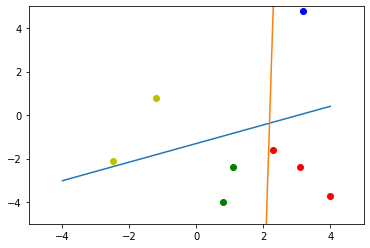

In [115]:
plt.ylim(-5,5)
plt.xlim(-5,5)

for i in range(len(x2)):
    def choose_color(c):
        if c == [0, 0]:
            return 'r'
        elif c == [0, 1]:
            return 'g'
        elif c == [1, 0]:
            return 'b'
        else:
            return 'y'
    [x, y] = x2[i]
    plt.plot(x, y, 'ro', color=choose_color(c2[i]))

show_line(np.transpose(weights)[0])
show_line(np.transpose(weights)[1])

Как видим, двуслойный персептрон смог разделить 4 класса точек двумя прямыми.

## Вывод

Проделав лабораторную работу, я реализовал однослойный и двуслойный персептроны, 
которые могут решать задачи классификации.
